# WeatherPy

* Wind speed tends to be higher near the poles, though the corrolation is fairly low.
* Temperature and nearness to the equator are highly corrolated; the closer to 0 degress latitude, the higher the temperature.
* Cloud coverage is not affected by the city's closeness to the equator

In [1]:
import pandas as pd
import numpy as np
import random
import openweathermapy.core as owm
from config import api_key
from config import gkey
import csv
import matplotlib.pyplot as plt
import requests
import json
from citipy import citipy

In [2]:
#Creating random set of 500 unique latitudes, longitudes, and corresponding city name
city_dict = {}
city_names = []
lat = []
lng = []
count = 0

while len(city_names) < 500:
    
    #Random latitudes/longitudes
    lat_try = random.randint(-900000,900000)/10000
    lng_try = random.randint(-1800000,1800000)/10000
    
    #Nearest city to those coordinates
    city = citipy.nearest_city(lat_try, lng_try).city_name
    country = citipy.nearest_city(lat_try, lng_try).country_code
    city_country = city + ", " + country
    
    #Find the city's true coordinates with Google API
    target_url = "https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" % (city_country, gkey)
    city_coord = requests.get(target_url).json()
    
    #Checking if city exists in Google search results
    if city_coord["status"] != "ZERO_RESULTS":
        
        #Adding only unique cities to list
        if city not in city_dict: #searching through dict instead of list to speed up processing time
            city_dict[city] = 0
            city_names.append(city)
            lat.append(city_coord["results"][0]["geometry"]["location"]["lat"])
            lng.append(city_coord["results"][0]["geometry"]["location"]["lng"])
            
            count += 1
            print(f"Retrieving Google results for city {count}: {city}.")

Retrieving Google results for city 1: cape town.
Retrieving Google results for city 2: kaitangata.
Retrieving Google results for city 3: chokurdakh.
Retrieving Google results for city 4: provideniya.
Retrieving Google results for city 5: punta arenas.
Retrieving Google results for city 6: albany.
Retrieving Google results for city 7: rikitea.
Retrieving Google results for city 8: kapaa.
Retrieving Google results for city 9: yuza.
Retrieving Google results for city 10: khorixas.
Retrieving Google results for city 11: new norfolk.
Retrieving Google results for city 12: castro.
Retrieving Google results for city 13: ushuaia.
Retrieving Google results for city 14: albury.
Retrieving Google results for city 15: puerto ayora.
Retrieving Google results for city 16: esperance.
Retrieving Google results for city 17: mataura.
Retrieving Google results for city 18: hithadhoo.
Retrieving Google results for city 19: henties bay.
Retrieving Google results for city 20: luanda.
Retrieving Google resul

Retrieving Google results for city 166: grand river south east.
Retrieving Google results for city 167: port alfred.
Retrieving Google results for city 168: belushya guba.
Retrieving Google results for city 169: saldanha.
Retrieving Google results for city 170: derzhavinsk.
Retrieving Google results for city 171: parnamirim.
Retrieving Google results for city 172: puerto colombia.
Retrieving Google results for city 173: cayenne.
Retrieving Google results for city 174: kavaratti.
Retrieving Google results for city 175: lamongan.
Retrieving Google results for city 176: thompson.
Retrieving Google results for city 177: airai.
Retrieving Google results for city 178: homer.
Retrieving Google results for city 179: ormara.
Retrieving Google results for city 180: vestmannaeyjar.
Retrieving Google results for city 181: san borja.
Retrieving Google results for city 182: avarua.
Retrieving Google results for city 183: tiksi.
Retrieving Google results for city 184: concepcion.
Retrieving Google re

Retrieving Google results for city 328: shreveport.
Retrieving Google results for city 329: katsuura.
Retrieving Google results for city 330: yuanping.
Retrieving Google results for city 331: antsohihy.
Retrieving Google results for city 332: ankang.
Retrieving Google results for city 333: port macquarie.
Retrieving Google results for city 334: verkhoyansk.
Retrieving Google results for city 335: cambridge.
Retrieving Google results for city 336: ahipara.
Retrieving Google results for city 337: kavieng.
Retrieving Google results for city 338: carutapera.
Retrieving Google results for city 339: sao joao da barra.
Retrieving Google results for city 340: borba.
Retrieving Google results for city 341: faanui.
Retrieving Google results for city 342: dergachi.
Retrieving Google results for city 343: bowen.
Retrieving Google results for city 344: wulanhaote.
Retrieving Google results for city 345: knysna.
Retrieving Google results for city 346: tilichiki.
Retrieving Google results for city 34

Retrieving Google results for city 491: vardo.
Retrieving Google results for city 492: katherine.
Retrieving Google results for city 493: pitimbu.
Retrieving Google results for city 494: kieta.
Retrieving Google results for city 495: sabang.
Retrieving Google results for city 496: louisbourg.
Retrieving Google results for city 497: ustyuzhna.
Retrieving Google results for city 498: yar-sale.
Retrieving Google results for city 499: russellville.
Retrieving Google results for city 500: tevaitoa.


In [3]:
all_weather = []

for index in range(0, len(city_names)):
    
    #Call API to check weather of each city
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&lat={lat[index]}&lon={lng[index]}&units=imperial"
    print(f"Retrieving Results from OpenWeather Map, city {index+1}: {city_names[index]}.")
    print(f"{url}")
    weather_response = requests.get(url).json()
    
    #Add extracts to list of dictionaries
    indiv_weather = {
        "City": city_names[index],
        "Latitude": lat[index],
        "Longitude": lng[index],
        "Temperature": weather_response["main"]["temp"],
        "Humidity (%)": weather_response["main"]["humidity"],
        "Clouds (%)": weather_response["clouds"]["all"],
        "Wind (MPH)": weather_response["wind"]["speed"]
    }
    all_weather.append(indiv_weather)

Retrieving Results from OpenWeather Map, city 1: cape town.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-33.9248685&lon=18.4240553&units=imperial
Retrieving Results from OpenWeather Map, city 2: kaitangata.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-46.28334&lon=169.8470967&units=imperial
Retrieving Results from OpenWeather Map, city 3: chokurdakh.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=70.622169&lon=147.916168&units=imperial
Retrieving Results from OpenWeather Map, city 4: provideniya.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=64.43272&lon=-173.238567&units=imperial
Retrieving Results from OpenWeather Map, city 5: punta arenas.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-53.1638329&lon=-70.9170683&units=imperial
Retrieving Results from OpenWeather M

Retrieving Results from OpenWeather Map, city 44: busselton.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-33.6554927&lon=115.3500188&units=imperial
Retrieving Results from OpenWeather Map, city 45: mar del plata.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-38.0054771&lon=-57.5426106&units=imperial
Retrieving Results from OpenWeather Map, city 46: dunedin.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-45.8787605&lon=170.5027976&units=imperial
Retrieving Results from OpenWeather Map, city 47: varnavino.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=57.3987392&lon=45.0870547&units=imperial
Retrieving Results from OpenWeather Map, city 48: talnakh.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=69.5&lon=88.39999999999999&units=imperial
Retrieving Results from OpenWeath

Retrieving Results from OpenWeather Map, city 87: east london.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-33.0291582&lon=27.8545867&units=imperial
Retrieving Results from OpenWeather Map, city 88: akyab.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=20.1527657&lon=92.86768610000001&units=imperial
Retrieving Results from OpenWeather Map, city 89: tasiilaq.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=65.6134561&lon=-37.6335696&units=imperial
Retrieving Results from OpenWeather Map, city 90: eenhana.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-17.4850319&lon=16.3287199&units=imperial
Retrieving Results from OpenWeather Map, city 91: acarau.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-2.897903&lon=-40.1192437&units=imperial
Retrieving Results from OpenWeather Ma

Retrieving Results from OpenWeather Map, city 130: manicore.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-6.511245499999999&lon=-60.9540073&units=imperial
Retrieving Results from OpenWeather Map, city 131: saint anthony.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=34.0749249&lon=-118.0912568&units=imperial
Retrieving Results from OpenWeather Map, city 132: udachnyy.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=66.407021&lon=112.2977807&units=imperial
Retrieving Results from OpenWeather Map, city 133: constitucion.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=31.6188807&lon=-106.3369609&units=imperial
Retrieving Results from OpenWeather Map, city 134: canton.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=40.79894729999999&lon=-81.378447&units=imperial
Retrieving Re

Retrieving Results from OpenWeather Map, city 172: puerto colombia.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=11.001004&lon=-74.950761&units=imperial
Retrieving Results from OpenWeather Map, city 173: cayenne.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=4.92242&lon=-52.3134531&units=imperial
Retrieving Results from OpenWeather Map, city 174: kavaratti.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=10.5593204&lon=72.63581340000002&units=imperial
Retrieving Results from OpenWeather Map, city 175: lamongan.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-7.126926099999999&lon=112.3337769&units=imperial
Retrieving Results from OpenWeather Map, city 176: thompson.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=55.7449251&lon=-97.8508715&units=imperial
Retrieving Results 

Retrieving Results from OpenWeather Map, city 215: pangnirtung.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=66.1465578&lon=-65.7012182&units=imperial
Retrieving Results from OpenWeather Map, city 216: sao filipe.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=14.8951679&lon=-24.4945636&units=imperial
Retrieving Results from OpenWeather Map, city 217: schwarzenbek.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=53.5048756&lon=10.4852612&units=imperial
Retrieving Results from OpenWeather Map, city 218: bilibino.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=68.05963899999999&lon=166.443893&units=imperial
Retrieving Results from OpenWeather Map, city 219: nizhneyansk.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=71.450058&lon=136.1122279&units=imperial
Retrieving Results 

Retrieving Results from OpenWeather Map, city 257: yinchuan.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=38.487193&lon=106.230908&units=imperial
Retrieving Results from OpenWeather Map, city 258: anloga.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=5.7872343&lon=0.8913523&units=imperial
Retrieving Results from OpenWeather Map, city 259: agadez.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=16.9741689&lon=7.986535&units=imperial
Retrieving Results from OpenWeather Map, city 260: westpunt.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=12.3700154&lon=-69.1521587&units=imperial
Retrieving Results from OpenWeather Map, city 261: gigmoto.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=13.7912671&lon=124.3532417&units=imperial
Retrieving Results from OpenWeather Map, city 26

Retrieving Results from OpenWeather Map, city 300: arusha.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-3.3869254&lon=36.6829927&units=imperial
Retrieving Results from OpenWeather Map, city 301: tuatapere.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-46.1357909&lon=167.6892231&units=imperial
Retrieving Results from OpenWeather Map, city 302: maragogi.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-9.010362599999999&lon=-35.2208449&units=imperial
Retrieving Results from OpenWeather Map, city 303: balimo.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-8.0053888&lon=142.9036317&units=imperial
Retrieving Results from OpenWeather Map, city 304: miles city.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=46.4083362&lon=-105.8405582&units=imperial
Retrieving Results from Ope

Retrieving Results from OpenWeather Map, city 342: dergachi.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=51.2440412&lon=48.767178&units=imperial
Retrieving Results from OpenWeather Map, city 343: bowen.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-20.0014803&lon=148.2262176&units=imperial
Retrieving Results from OpenWeather Map, city 344: wulanhaote.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=46.072731&lon=122.093123&units=imperial
Retrieving Results from OpenWeather Map, city 345: knysna.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-34.0350856&lon=23.0464693&units=imperial
Retrieving Results from OpenWeather Map, city 346: tilichiki.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=60.43333299999999&lon=166.0486109&units=imperial
Retrieving Results from OpenWeath

Retrieving Results from OpenWeather Map, city 385: itaperuna.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-21.1877747&lon=-41.8799408&units=imperial
Retrieving Results from OpenWeather Map, city 386: ancud.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-41.8675003&lon=-73.8276965&units=imperial
Retrieving Results from OpenWeather Map, city 387: auki.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-8.7678593&lon=160.6960306&units=imperial
Retrieving Results from OpenWeather Map, city 388: laguna.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=33.2573408&lon=-111.8767709&units=imperial
Retrieving Results from OpenWeather Map, city 389: verkhnyaya inta.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=65.9831988&lon=60.31105359999999&units=imperial
Retrieving Results from Ope

Retrieving Results from OpenWeather Map, city 428: fatehpur.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=32.0671658&lon=73.50345659999999&units=imperial
Retrieving Results from OpenWeather Map, city 429: saquena.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-4.6616838&lon=-73.5446889&units=imperial
Retrieving Results from OpenWeather Map, city 430: santa barbara.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=34.4326369&lon=-119.6938397&units=imperial
Retrieving Results from OpenWeather Map, city 431: lavrentiya.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=65.58354899999999&lon=-171.0389249&units=imperial
Retrieving Results from OpenWeather Map, city 432: middelburg.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-25.769902&lon=29.4639354&units=imperial
Retrieving Re

Retrieving Results from OpenWeather Map, city 471: aden.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=12.7854969&lon=45.0186548&units=imperial
Retrieving Results from OpenWeather Map, city 472: zhezkazgan.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=47.79636559999999&lon=67.7020019&units=imperial
Retrieving Results from OpenWeather Map, city 473: krasnogorskoye.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=57.7046513&lon=52.4917523&units=imperial
Retrieving Results from OpenWeather Map, city 474: lethem.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=3.3663183&lon=-59.7977761&units=imperial
Retrieving Results from OpenWeather Map, city 475: kargat.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=55.19873310000001&lon=80.28352249999999&units=imperial
Retrieving Results 

In [4]:
#Create dataframe from extracted data and export to CSV
weather_df = pd.DataFrame(all_weather)
weather_df.head()

#Export to CSV
weather_df.to_excel("weather_in_cities.xlsx", index=False)

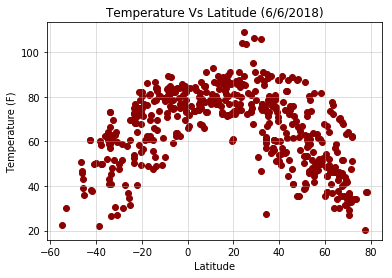

In [5]:
plt.scatter(weather_df["Latitude"],weather_df["Temperature"], c="darkred")
plt.grid(alpha=.5)

plt.title("Temperature Vs Latitude (6/6/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#Export to PNG
plt.savefig("temperature.png")

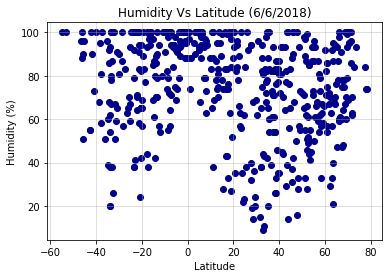

In [6]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity (%)"], c="darkblue")
plt.grid(alpha=.5)

plt.title("Humidity Vs Latitude (6/6/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Export to PNG
plt.savefig("humidity.png")

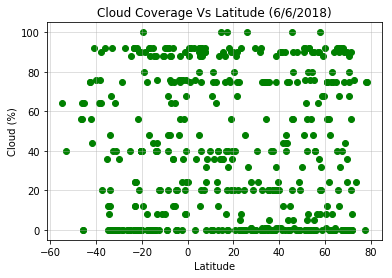

In [7]:
plt.scatter(weather_df["Latitude"],weather_df["Clouds (%)"], c="green")
plt.grid(alpha=.5)

plt.title("Cloud Coverage Vs Latitude (6/6/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloud (%)")

#Export to PNG
plt.savefig("clouds.png")

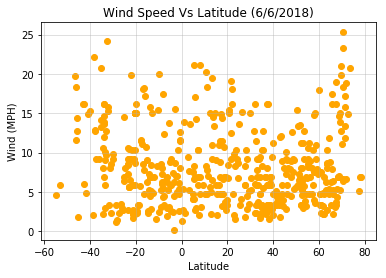

In [8]:
plt.scatter(weather_df["Latitude"],weather_df["Wind (MPH)"], c="orange")
plt.grid(alpha=.5)

plt.title("Wind Speed Vs Latitude (6/6/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind (MPH)")

#Export to PNG
plt.savefig("wind.png")